In [1]:
! conda install -c conda-forge cudatoolkit=11.2 cudnn=8.1.0  tensorflow keras_preprocessing numpy scikit-learn pandas -y


Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\berna\anaconda3\envs\tf

  added / updated specs:
    - cudatoolkit=11.2
    - cudnn=8.1.0


The following NEW packages will be INSTALLED:

  cudatoolkit        conda-forge/win-64::cudatoolkit-11.2.2-h7d7167e_13 
  cudnn              conda-forge/win-64::cudnn-8.1.0.77-h3e0f4f4_0 



Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... "By downloading and using the CUDA Toolkit conda packages, you accept the terms and conditions of the CUDA End User License Agreement (EULA): https://docs.nvidia.com/cuda/eula/index.html" 

"By downloading and using the cuDNN conda packages, you accept the terms and conditions of the NVIDIA cuDNN EULA - https://docs.nvidia.com/deeplearning/cudnn/sla/index.html" 

done


In [1]:
import tensorflow as tf
print(tf.__version__)


2.10.0


In [4]:
import tensorflow as tf

# Verificar se a GPU está disponível
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Criar um tensor simples
with tf.device('/GPU:0'):
    a = tf.constant([[1.0, 2.0], [3.0, 4.0]])
    b = tf.constant([[1.0, 1.0], [0.0, 1.0]])
    c = tf.matmul(a, b)

print(c)


Num GPUs Available:  0
tf.Tensor(
[[1. 3.]
 [3. 7.]], shape=(2, 2), dtype=float32)


In [1]:

import tensorflow as tf
import keras_preprocessing
from tensorflow.keras.preprocessing.image import load_img
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

df = pd.read_csv("train.csv", index_col=0)
print(df.shape)
df.head()


train_set, valid_set = train_test_split(df, test_size=0.2, random_state=42)

print(train_set.shape)
print(valid_set.shape)
SOURCE = 'images/train'
VALID_DIR = 'temp/valid/'
TRAIN_DIR = 'temp/train/'

(1821, 4)
(1456, 4)
(365, 4)


In [2]:

import os
import shutil

# Mudar o diretório de trabalho
os.chdir('e:/gitHub2/IA-deeplearning/plant-pathology')

# Deletar o diretório temporário, se existir
if os.path.exists('temp'):
    shutil.rmtree('temp')

# Criar o diretório temporário
os.mkdir('temp')

# Criar subdiretórios para treinamento
os.mkdir('temp/train')
os.mkdir('temp/train/healthy')
os.mkdir('temp/train/multiple_diseases')
os.mkdir('temp/train/rust')
os.mkdir('temp/train/scab')

# Criar subdiretórios para validação
os.mkdir('temp/valid')
os.mkdir('temp/valid/healthy')
os.mkdir('temp/valid/multiple_diseases')
os.mkdir('temp/valid/rust')
os.mkdir('temp/valid/scab')

In [3]:
# copy images to train directory
from shutil import copyfile

# copy images to valid directory
for index, data in valid_set.iterrows():
    label = df.columns[np.argmax(data)]
    filepath = os.path.join(SOURCE, index + ".jpg")
    destination = os.path.join(VALID_DIR, label, index + ".jpg")
    copyfile(filepath, destination)
    
for subdir in os.listdir(VALID_DIR):
    print(subdir, len(os.listdir(os.path.join(VALID_DIR, subdir))))


# copy images to train directory
for index, data in train_set.iterrows():
    label = df.columns[np.argmax(data)]
    filepath = os.path.join(SOURCE, index + ".jpg")
    destination = os.path.join(TRAIN_DIR, label, index + ".jpg")
    copyfile(filepath, destination)
    
for subdir in os.listdir(TRAIN_DIR):
    print(subdir, len(os.listdir(os.path.join(TRAIN_DIR, subdir))))

healthy_dir = os.path.join(TRAIN_DIR, 'healthy')
mdiseases_dir = os.path.join(TRAIN_DIR, 'multiple_diseases')
scab_dir = os.path.join(TRAIN_DIR, 'scab')
rust_dir = os.path.join(TRAIN_DIR, 'rust')

healthy_files = os.listdir(healthy_dir)
mdiseases_files = os.listdir(mdiseases_dir)
scab_files = os.listdir(scab_dir)
rust_files = os.listdir(rust_dir) 


healthy 100
multiple_diseases 18
rust 120
scab 127
healthy 416
multiple_diseases 73
rust 502
scab 465


In [7]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator


training_datagen = ImageDataGenerator(rescale = 1./255,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      )

validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(TRAIN_DIR, target_size=(150,150), class_mode='categorical')
validation_generator = validation_datagen.flow_from_directory(VALID_DIR, target_size=(150,150), class_mode='categorical')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(170, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.summary()

"""
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator


training_datagen = ImageDataGenerator(rescale = 1./255,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      )

validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(TRAIN_DIR, target_size=(150,150), class_mode='categorical')
validation_generator = validation_datagen.flow_from_directory(VALID_DIR, target_size=(150,150), class_mode='categorical')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(170, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='sigmoid'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='tanh'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.summary()



"""


Found 1456 images belonging to 4 classes.
Found 365 images belonging to 4 classes.


c:\Users\berna\OneDrive\Documentos\GitHub\IA-atividade\.conda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 72, 72, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,473,988 (13.25 MB)

 Trainable params: 3,473,988 (13.25 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:

# Compilar o modelo
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Callbacks
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("cnn.keras", save_best_only=True)

# Calcular steps_per_epoch e validation_steps
batch_size = 1024
steps_per_epoch = len(train_generator) // batch_size
validation_steps = len(validation_generator) // batch_size


# Verificar se os generators têm pelo menos um lote de dados
if train_generator is not None and validation_generator is not None:
    if len(train_generator) > 0 and len(validation_generator) > 0:
        try:
            history = model.fit(
                train_generator,
                epochs=50,
                steps_per_epoch=steps_per_epoch,
                validation_data=validation_generator,
                validation_steps=validation_steps,
                callbacks=[early_stopping_cb, checkpoint_cb]
            )
        except Exception as e:
            print(f"Exception: {e}")
    else:
        print("Error: The generators do not have any data.")
else:
    print("Error: One of the generators is None.")


Num GPUs Available:  0
temp/train/ temp/valid/
Epoch 1/50


c:\Users\berna\OneDrive\Documentos\GitHub\IA-atividade\.conda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


46/46 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.3134 - loss: 1.3758 - val_accuracy: 0.3288 - val_loss: 1.2702
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.3268 - loss: 1.2398 - val_accuracy: 0.3288 - val_loss: 1.2638
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.3121 - loss: 1.2404 - val_accuracy: 0.3288 - val_loss: 1.2402
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.3423 - loss: 1.2442 - val_accuracy: 0.3945 - val_loss: 1.2299
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.3905 - loss: 1.2328 - val_accuracy: 0.4712 - val_loss: 1.1902
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.3988 - loss: 1.2199 - val_accuracy: 0.4411 - val_loss: 1.1928
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.4468 - loss: 1.1922 - val_accuracy: 0.4740 - val_loss: 1.7788
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.4984 - loss: 1.2546 - val_accuracy: 0.6438 - val_loss: 0.9934
Epo

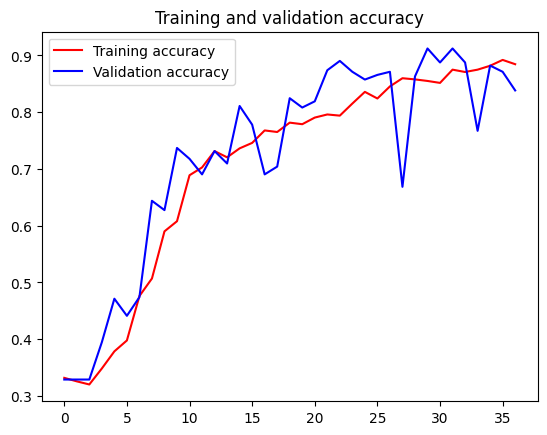

In [9]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.show()

In [11]:

# Função para testar diferentes batch sizes

def test_batch_size(batch_size):
  
    try:
        model.fit(
            train_generator,
            epochs=1,
            steps_per_epoch=len(train_generator) // batch_size,
            validation_data=validation_generator,
            validation_steps=len(validation_generator) // batch_size,
            batch_size=batch_size
        )
        print(f"Batch size {batch_size} funciona!")
    except tf.errors.ResourceExhaustedError:
        print(f"Batch size {batch_size} é muito grande para a memória da GPU.")

# Testar diferentes batch sizes
for batch_size in [ 256, 512, 1024]:
    test_batch_size(batch_size)

ImportError: Could not import PIL.Image. The use of `load_img` requires PIL.

In [12]:
import PIL
print(PIL.__version__)


ModuleNotFoundError: No module named 'PIL'